# 1. 학습목표
* 시계열의 기본 성질에서 시계열의 요소는 어떤 것들이 있는지 알아봅시다.
* 정상성과 정상과정에 대해 알아봅시다.

## 들어가며
* AirPassengers 데이터셋은 1949년부터 1960년까지의 월간 항공기 이용 승객수를 기록한 데이터셋입니다.
* AirPassengers 데이터셋은 시계열 데이터로서 중요한 특성을 가지고 있고 분석 시 뚜렷한 특징을 확인할 수 있기 때문에 교육용으로 많이 사용됩니다.
* 시계열의 요소는 추세(Trend), 계절성(Seasonality), 주기성(Cycle)이 있습니다.
* 이번 강의에서 다룰 핵심 키워드는 정상성(Stationarity), 비정상성(Non-Stationarity), 정상과정(Stationary Process), KPSS(Kwiatkowski-Phillips-Schmidt-Shin) 검정, ADF(Augmented Dickey-Fuller test) 검정이 있습니다.

# 2. 시계열의 시본 성질

## 시계열의 요소
1. AirPassengers 데이터 셋    
* 데이터 분석을 하기 전에 데이터 탐색적 데이터 분석(EDA : Exploratory Data Analysis)를 통해 각 feature들이 어떤 의미를 가지는지에 대해서 알아보는 것이 중요합니다.

2. 시계열의 요소
- 추세(trend)
- 계절성(seasonal)
- 잔차(residual)
- 랜덤(random)

### AirPassengers 데이터 셋
- 교육 목적으로 가장 유명한 시계열 데이터셋 입니다.
- 프로그래밍 언어 R에서는 기본 제공 데이터이며, Kaggle을 통해 쉽게 다운받을 수 있습니다.
- 1949년 1월부터 1960년 12월까지의 승객 수 데이터가 제시되어 있습니다.    
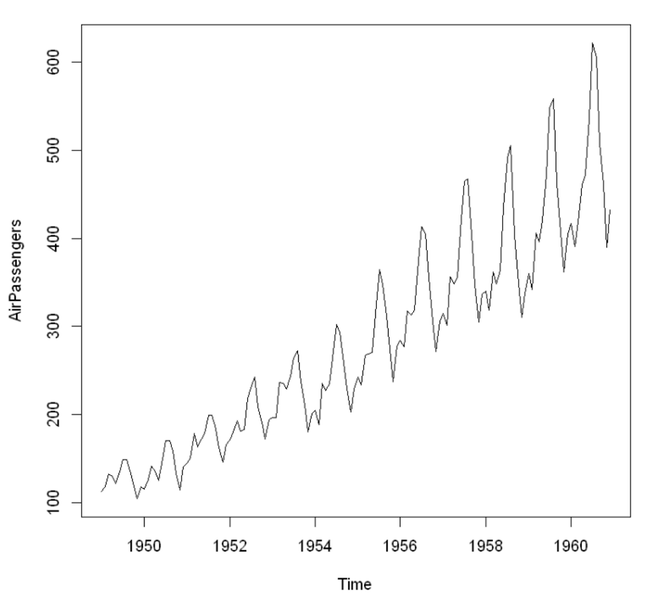

1. 추세 (Trend)
* 장기적으로 증가하거나, 감소하는 경향성이 존재하는 것을 의미합니다.
* 주로 시계열에서 기울기가 증가하거나 감소할 때 관찰됩니다.
* 일정 기간 동안 지속되는 변화이며, 반복적인 패턴이 아니더라도 장기적인 방향성을 보여줍니다.

2. 계절성 (Seasonality)
* 계절적 요인의 영향을 받아 1년, 혹은 일정 기간 안에 반복적으로 나타나는 패턴을 의미합니다.
* 빈도의 형태로 나타나며 항상 일정한 경우가 많습니다.

3. 주기성 (Cycle)
* 정해지지 않은 빈도, 기간으로 일어나는 상승 혹은 하락을 의미합니다. (주기성은 학자마다 조금씩 정의가 다르니, 참고로만 알아 두시길 바랍니다)

### 요소별로 시계열 분해하기

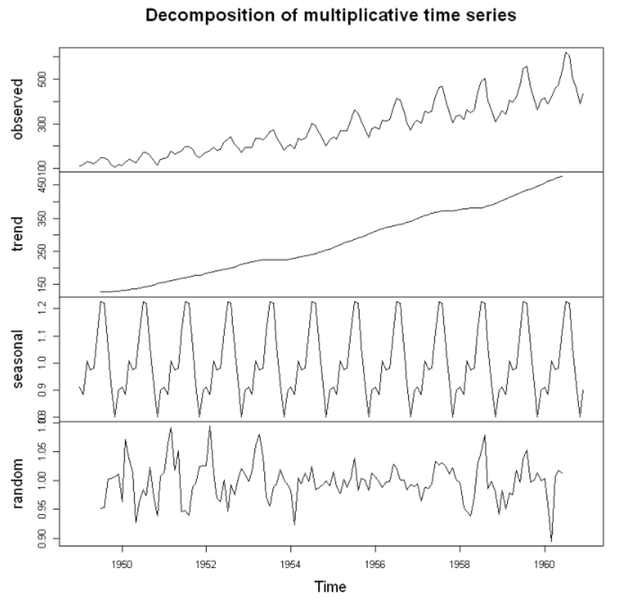

시계열 분해 또한 하나의 분야입니다. 여기서는 시계열 분해에 대한 자세한 설명은 다루지 못하고 분해 결과만을 보고 시계열의 기본 성질에 대해 파악해보겠습니다. 바로 위에서 설명 드렸던 추세(Trend), 계절성(Seasonality), 주기성(Cycle)을 그래프와 연관지어 설명드립니다.

* observed 는 원래의 값(raw data) 입니다.
* trend는 확정적 추세만을 뽑아서 시각화 한 것입니다.
* seasonal은 시각화 자료에서 보시다시피 비슷한 모양이 구간별로 12번 반복됩니다. (1년마다 반복되는 계절성을 나타내고 있습니다.)
* random은 잔차(residual)이라고도 하며 trend와 seasonal을 뺀 나머지를 나타내고 있습니다.여기서는 더이상 뽑아낼 수 있는 시계열의 기본성질이 없어야합니다.

### 시계열의 정상성

정상성이 필요한 이유
* 과거 시점의 통계적인 특징을 통해 미래 시점에 적용하기 위해 시계열의 정상성(안정된 수준)을 알아야 합니다.

#### 예측할 수 있는 것과 예측할 수 없는 것
만약 시계열의 특징이 관측된 시간과 무관하지 않다면, 해당 시계열은 시간에 따라 특징이 변하고 있다고 볼 수 있습니다.    
지금 현재 시간이 t라고 할 경우, t-10 ~ t-1까지 관측되었던 시계열의 특징이 t ~ t+10과 동일하지 않다는 것이죠.    
이런 경우에 우리는 과연 t-10 ~ t-1 시점을 관측하여 얻어낸 모델을 t ~ t+10 시점에 적용할 수 있을까요?    
> 그렇기에 ‘정상성’이 필요합니다.
    
#### 정상성에 대해 이야기하기 전에...
통계적 시계열 분석에서, 우리는 어떤 확률 과정(Stochastic process)을 따르는 시계열이 있다고 가정하고,     
그 통계적 과정으로 부터 나타난 표본(Sample)을 통해 그 통계적 과정을 알아내고자 합니다.    
하지만 통계적 과정을 정확하게 알아내는 것은 매우 어려우며, 우리는 이를 해결하기 위해 강한 가정(assumption)을 바탕에 깔아 두어야 합니다.    
> 정상성이란 이런 강한 가정 중 하나입니다.

#### 정상 과정 (Stationary Process)
확률론에서 말하는 정상 과정이란 통계적인 특성(평균, 분산 등...)이 시간에 따라서 변하지 않는 특징을 가지는 것을 말하며     
정상성을 띠는 확률 과정이 바로 정상 과정이라 설명할 수 있습니다.

# 3. 정상성(Stationarity)

 정상성(Stationarity)과 비정상성(Non-Stationary)

* 시계열 데이터를 이해하고 설명하기 위해 정상성과 비정상성의 이해가 필요합니다.




* 정상성이란 ‘시간에 상관없이 시계열이 일정한 성질’을 띠는 시계열을 지칭하는 것으로, ‘시간에 상관없이 일정한’ 것을 의미합니다.
* 정상성은 강정상성과 약정상성 두가지 정의가 존재합니다.
* 강정상성은 모든 적률(moments)이 시간과 무관하게 일정한 시계열을 뜻합니다.
> 쉽게 말해서, 기저를 이루는 확률분포(Underlying distribution)가 시간에 무관하게 언제나 일정하다는 것을 의미합니다.
* 약정상성은 시간에 따라 일정한 평균, 분산, 공분산을 갖는 확률과정으로 정의됩니다.
* 약정상시계열(weak stationary time series)은 다음의 세 가지 조건을 만족하는 시계열로 다음과 같습니다.
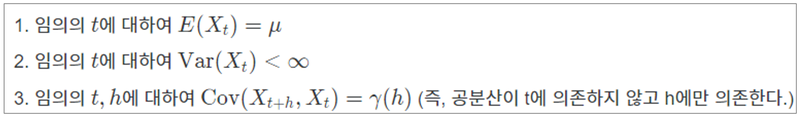    

> 약정상성을 띠는 시계열 데이터는 어느 시점(t)에 관측해도 확률 과정의 성질(E(Xt), Var(Xt))이 변하지 않는것을 말합니다.    

여기서의 약정상 시계열은 약정상성을 지닌 시계열을 의미하며 위의 세 가지 조건은 가장 일반적으로 활용되는 약정상 시계열의 정의입니다.

## 정상성을 확인하는 방법
* KPSS(Kwiatkowski-Phillips-Schmidt-Shin Test) 검정
* ADF (Augmented Dickey-Fuller) 검정

### KPSS 검정
* KPSS검정의 귀무가설은 '시계열 과정이 정상적(Stationary)이다'로 설정되어 있으며, 대립 가설이 '시계열 과정이 비정상적(non-stationary)이다'로 설정되어 있습니다.
* `statsmodels` 라이브러리의 `kpss` 함수를 이용하여 쉽게 사용이 가능합니다.
    * KPSS 함수는 kpss_stat, p_value, lags, crit 총 네가지 값을 반환하는데 이를 해석하기 위한 가장 직관적인 방법은 p-value를 이용하는 것입니다.

In [1]:
# Kpss 불러오기
from statsmodels.tsa.stattools import kpss

# 시계열 테스트 데이터
time_series_data_test = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# KPSS 검정 수행
kpss_outputs = kpss(time_series_data_test)

# 검정 결과 출력
print('KPSS test 결과 : ')
print('--'*15)
print('KPSS Statistic:', kpss_outputs[0])
print('p-value:', kpss_outputs[1])

KPSS test 결과 : 
------------------------------
KPSS Statistic: 0.5941176470588235
p-value: 0.023171122994652404


### ADF 검정
* ADF 검정의 귀무 가설은 '시계열에 단위근이 존재한다' 이며, 대립가설은 '시계열이 정상성을 만족한다’입니다.
* `statsmodels` 라이브러리의 `adfuller` 함수를 이용하여 쉽게 사용 가능합니다.
    * ADF함수는 adf, pvalue, usedlag, nobs, critical values 등을 반환하는데 이 역시 p-value를 활용하는 것이 가장 직관적입니다.

In [2]:
# adfuller 불러오기
from statsmodels.tsa.stattools import adfuller

# 시계열 테스트 데이터
time_series_data_test = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# ADF 검정 수행
adf_outputs = adfuller(time_series_data_test)

# 검정 결과 출력
print('ADF Test 결과 : ')
print('--'*15)
print('ADF Statistic:', adf_outputs[0])
print('p-value:', adf_outputs[1])

ADF Test 결과 : 
------------------------------
ADF Statistic: -0.8539125638299666
p-value: 0.802770742333957


### KPSS 검정과 ADF 검정의 차이
* Deterministic Trend, 즉 확정적인 추세가 존재하는 경우에 둘의 검정 결과에는 차이가 존재합니다.
* KPSS검정은 기본적(default option에서)으로 ‘around the mean’에 대한 검정을 진행하기 때문에, 확정적 추세가 존재하는 경우 ADF와는 다른 결론을 내릴 수도 있습니다.
* 항상 시각적으로도 stationary한지 파악하는 것이 중요합니다...!

## 정상성을 부여하는 방법
1. 로그 변환 (log transformation)
2. 아래 데이터의 주석을 바꾸어가며 시각적으로 어떻게 변환되는지 확인해보세요.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 시계열 데이터 정의
time_series_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# 아래의 주석을 없애고 다시 실행해보세요.
#time_series_data = [random.randint(1, 100) for _ in range(50)]

# 시계열 데이터 로그변환
time_series_data_log = np.log(time_series_data)

* 첫번째 주석의 데이터는 단순 선형이 로그 변환을 통해 비선형의 특징을 가지는 것을 알 수 있습니다.
* 두번째 주석의 데이터는 로그 변환을 하는 경우 겉보기에는 크게 값이 변한 것 같진 않지만 일부 구간의 선 끝이 완만해지거나 y축의 값이 큰 값으로 줄어 든 것을 확인할 수 있습니다.

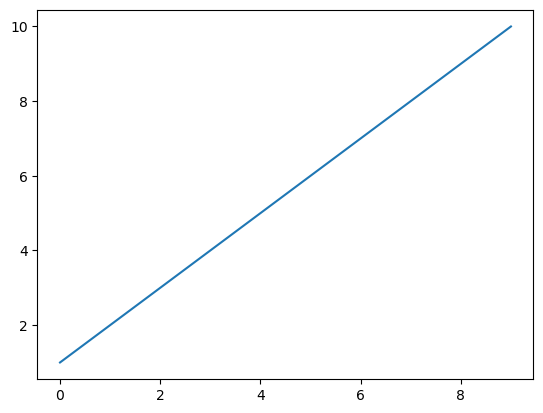

In [4]:
# 로그 변환되지 않은 시계열 데이터 시각화
plt.plot(time_series_data)
plt.show()

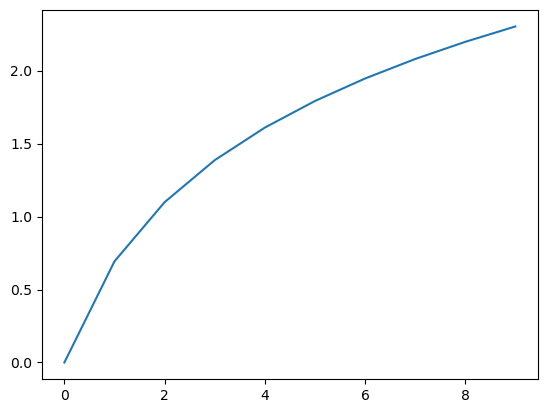

In [5]:
import matplotlib.pyplot as plt

# 로그 변환된 시계열 데이터 시각화
plt.plot(time_series_data_log)
plt.show()

* 평균을 일정하게 만드는 방법
    1. 회귀 (regression approach)
    2. 평활 (smoothing)
    3. 차분 (differencing)    
    
회귀는 시계열 데이터를 선형 회귀 모델을 사용하여 예측된 값을 실제값과의 차이를 통해 평균을 일정하게 조정할 수 있습니다.     
이때 predictions는 선형 회귀 모델을 통해 나온 예측된 값을 의미합니다.
    
평활은 시계열 데이터의 잡음을 제거하기 위해 주로 사용되며 아래 코드를 확인해보면     
smoothed_value가 value에 비해 많이 평활(smoothing)해진 것을 확인할 수 있습니다.

array([<Axes: >, <Axes: >], dtype=object)

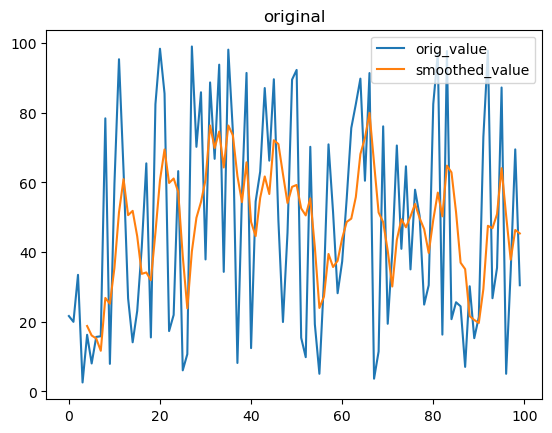

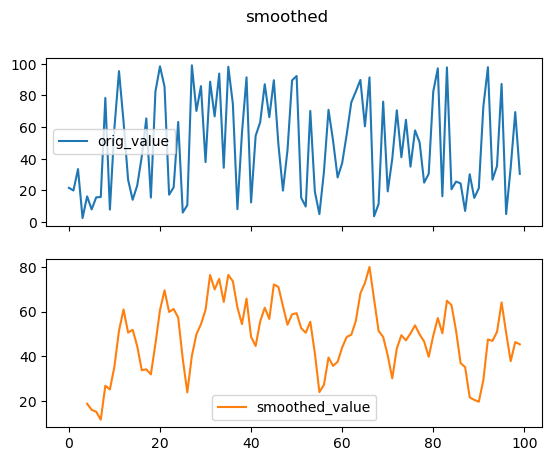

In [6]:
import random
import pandas as pd

# 랜덤한 수를 가지고 있는 Pandas 데이터프레임을 생성합니다.
df0 = pd.DataFrame({'orig_value': [random.uniform(0, 100) for _ in range(100)]})
df1 = pd.DataFrame({'orig_value': [random.uniform(0, 100) for _ in range(100)]})

df0['smoothed_value'] = df0['orig_value'].rolling(5).mean()

# 잡음이 포함된 시계열 데이터를 시각화합니다.
df0.plot(legend=True, title='original')

# 잡음이 제거된 시계열 데이터를 시각화합니다.
df0.plot(legend=True, subplots=True, title='smoothed')

* '차분'이란 시계열 데이터들의 시간상의 차이를 구하는 것입니다. 
* 한번의 차이를 구하는 것을 ‘1차 차분’이라고 하며, 1차 차분값을 다시 차분하는 것을 ‘2차 차분’이라고 합니다.
* 차분은 데이터의 길이가 충분할 경우 여러 번 수행될 수도 있습니다.
     
y 
t
∗
​
 =y 
t
​
 −y 
t−k
​




array([<Axes: >, <Axes: >], dtype=object)

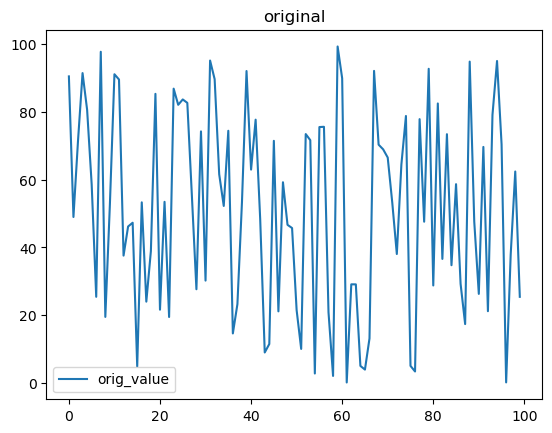

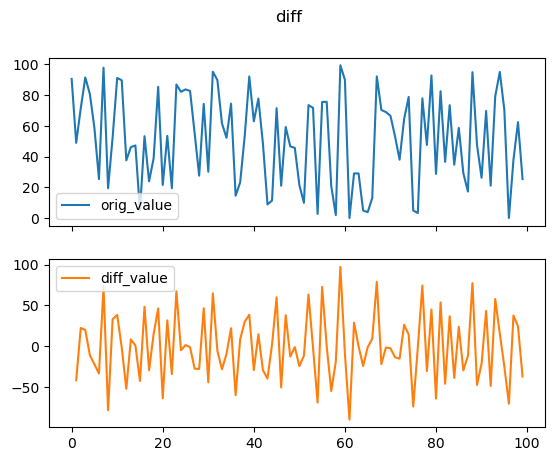

In [7]:
# 위에서 사용한 잡음이 있는 데이터를 그대로 활용하여 시각화합니다.
df1.plot(title='original')

# 차분을 적용하고 시각화합니다.
df1['diff_value'] = df1['orig_value'].diff()
df1.plot(legend=True, subplots=True, title='diff')

> 은 비정상적 시계열은 누적 과정(Integrated Process)이고 정상적 시계열이 누적되어 비정상적 시계열을 이루었기 때문에,      
다시 누적된 것을 차분해줌으로써 그 이면의 정상적 과정을 우리가 볼 수 있게 되는 것입니다.


# 4. 마무리하며

1. 들어가며
* 시계열의 기본 성질에는 무엇이 있을지, 정상성은 무엇이며, 왜 필요할지, 어떻게 만들 수 있을지 생각해 봅시다.
    
---

2. 시계열의 기본 성질
* 추세(Trend): 장기적으로 증가하거나, 감소하는 경향성이 존재하는 것을 의미합니다. 
* 계절성(Seasonality): 계절적 요인의 영향을 받아 1년, 혹은 일정 기간 안에 반복적으로 나타나는 패턴을 의미합니다.
* 주기성(Cycle): 정해지지 않은 빈도, 기간으로 일어나는 상승 혹은 하락을 의미합니다.
---    
3. 정상성
* 통계적 과정을 정확하게 알아내는 것은 매우 어렵기 때문에 강한 가정을 바탕을 깔아 두어야 하는데, 정상성이란 이런 강한 가정 중 하나를 뜻합니다.
* 정상성 부여 방법중 분산을 일정하게 만드는 방법으로 로그변환을 하는 방법이 있습니다.
* 정상성 부여 방법중 평균을 일정하게 만드는 방법으로 회귀/평활/차분을 하는 방법이 있습니다.